# Correlation analysis for delays

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


df = pd.read_csv('data/flights_processed.csv')

### Available variables:

#


#### Excluding cancelled flight, as they contain NA values 

In [10]:
df_cancelled = df[df['Cancelled'] == 1]
df = df[df['Cancelled'] != 1]

In [11]:
df_cancelled.to_csv('data/cancelled_flights', index=False)

## Analysing 

In [12]:
df['FlightDate'] = pd.to_datetime(df['FlightDate'])

summary_df = df.groupby(['DayOfWeek', 'DepDel15']).size().unstack(fill_value=0)
summary_df['TotalFlights'] = summary_df.sum(axis=1)
summary_df['Prop_DepDel15'] = summary_df[1] / summary_df['TotalFlights']
summary_df

DepDel15,0.0,1.0,TotalFlights,Prop_DepDel15
DayOfWeek,,,,
1,252886,64738,317624,0.203820
2,244076,53031,297107,0.178491
3,231485,65961,297446,0.221758
4,249287,67587,316874,0.213293
5,248840,70673,319513,0.221190
6,214025,59095,273120,0.216370
7,250872,74484,325356,0.228931


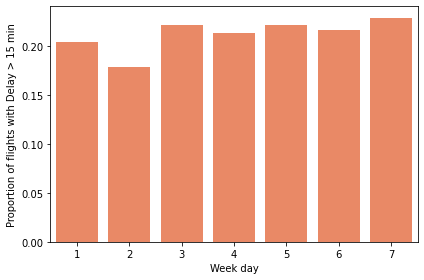

In [13]:
plt.figure(figsize=(6, 4))
sns.barplot(x=summary_df.index, y=summary_df['Prop_DepDel15'], color='coral')
plt.xlabel("Week day")
plt.ylabel("Proportion of flights with Delay > 15 min")
plt.tight_layout()
plt.show()

In [14]:
from scipy.stats import chi2_contingency

# Suppose you already have the 'summary_df' DataFrame containing the proportion of flights with DepDel15 by day of the week.
# Make sure you have the 'DayOfWeek' and 'Prop_DepDel15' columns in 'summary_df'.

contingency_table = pd.pivot_table(summary_df, values='Prop_DepDel15', index='DayOfWeek', columns=None)

# Chi-squared test
chi2, p, _, _ = chi2_contingency(contingency_table)

alpha = 0.05

if p < alpha:
    print("There is a significant relationship between the day of the week and the proportion of flights with DepDel15.")
else:
    print("There is no significant relationship between the day of the week and the proportion of flights with DepDel15.")

print(f"Chi-squared Statistic: {chi2}")
print(f"P-value: {p}")

There is no significant relationship between the day of the week and the proportion of flights with DepDel15.
Chi-squared Statistic: 0.0
P-value: 1.0


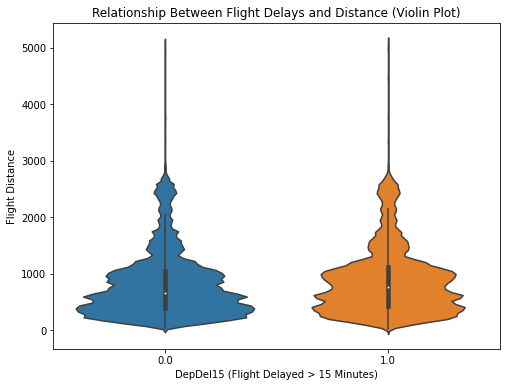

In [15]:
plt.figure(figsize=(8, 6))
sns.violinplot(data=df, x='DepDel15', y='Distance')
plt.xlabel("DepDel15 (Flight Delayed > 15 Minutes)")
plt.ylabel("Flight Distance")
plt.title("Relationship Between Flight Delays and Distance (Violin Plot)")
plt.show()

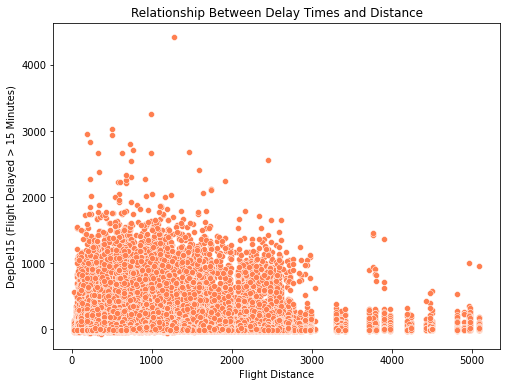

In [16]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='Distance', y='DepDelay', color='coral')
plt.ylabel("DepDel15 (Flight Delayed > 15 Minutes)")
plt.xlabel("Flight Distance")
plt.title("Relationship Between Delay Times and Distance")
plt.show()

In [17]:
bin_width = 250

max_distance = df['Distance'].max()
num_bins = int(np.ceil(max_distance / bin_width))

bins = np.arange(0, (num_bins + 1) * bin_width, bin_width)

df['DistanceBin'] = pd.cut(df['Distance'], bins=bins, labels=bins[:-1])

bin_proportions = df.groupby('DistanceBin')['DepDel15'].mean().reset_index()

bin_proportions.columns = ['DistanceBin', 'ProportionDelayed']

print(bin_proportions)

   DistanceBin  ProportionDelayed
0            0           0.179632
1          250           0.185714
2          500           0.204567
3          750           0.230126
4         1000           0.248719
5         1250           0.226455
6         1500           0.241812
7         1750           0.243719
8         2000           0.250015
9         2250           0.225178
10        2500           0.239912
11        2750           0.189349
12        3000           0.500000
13        3250           0.257868
14        3500           0.132075
15        3750           0.220790
16        4000           0.183721
17        4250           0.366412
18        4500           0.384937
19        4750           0.309302
20        5000           0.433566


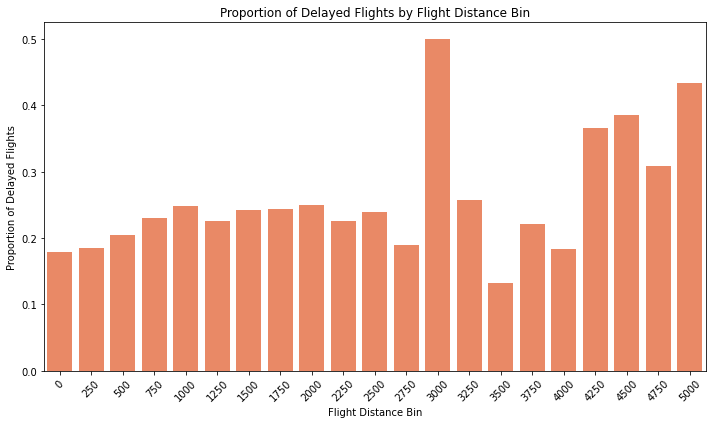

In [18]:
plt.figure(figsize=(10, 6))
sns.barplot(data=bin_proportions, x='DistanceBin', y='ProportionDelayed', color='coral')
plt.xlabel("Flight Distance Bin")
plt.ylabel("Proportion of Delayed Flights")
plt.title("Proportion of Delayed Flights by Flight Distance Bin")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [19]:
from scipy.stats import spearmanr

correlation, p_value = spearmanr(bin_proportions['DistanceBin'], bin_proportions['ProportionDelayed'])

print(f"Spearman Correlation Coefficient: {correlation:.3f}")
print(f"P-Value: {p_value:.3f}") # pvalue = 0.035 indicates a significant monotonic relationship

Spearman Correlation Coefficient: 0.461
P-Value: 0.035


In [20]:
df['FlightDate'] = pd.to_datetime(df['FlightDate'])

summary_df = df.groupby(['DayOfMonth', 'DepDel15']).size().unstack(fill_value=0)
summary_df['TotalFlights'] = summary_df.sum(axis=1)
summary_df['Prop_DepDel15'] = summary_df[1] / summary_df['TotalFlights']

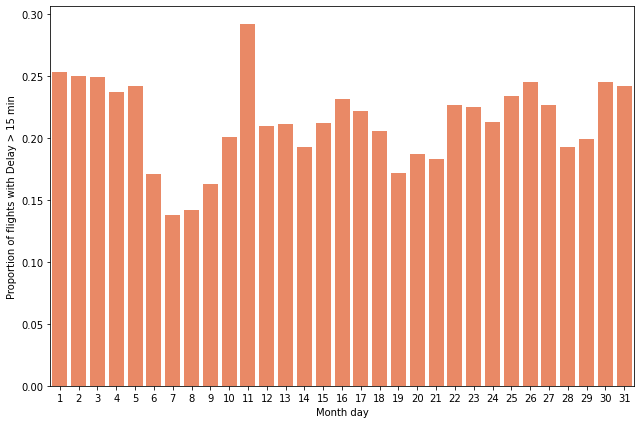

In [21]:
plt.figure(figsize=(9, 6))
sns.barplot(x=summary_df.index, y=summary_df['Prop_DepDel15'], color='coral')
plt.xlabel("Month day")
plt.ylabel("Proportion of flights with Delay > 15 min")
plt.tight_layout()
plt.show()

In [22]:
from scipy.stats import f_oneway

grouped_data = df.groupby('Reporting_Airline')

dep_delay_groups = []

for group_name, group_df in grouped_data:
    dep_delay_data = group_df['DepDelay'].dropna()  # Drop missing values if any
    dep_delay_groups.append(dep_delay_data)

f_statistic, p_value = f_oneway(*dep_delay_groups)

print("One-way ANOVA Results:")
print(f"F-statistic: {f_statistic}")
print(f"P-value: {p_value}")

alpha = 0.05  
if p_value < alpha:
    print("Reject the null hypothesis: There is a significant difference between groups.")
else:
    print("Fail to reject the null hypothesis: There is no significant difference between groups.")

One-way ANOVA Results:
F-statistic: 1028.0511724684716
P-value: 0.0
Reject the null hypothesis: There is a significant difference between groups.


In [23]:
df_num = df.select_dtypes(include=[np.number])
df_num.drop(columns = ['Flight_Number_Reporting_Airline', 'DepartureDelayGroups','ArrivalDelayGroups','Cancelled','Diverted','DistanceGroup', 'DepDel15'], inplace=True)

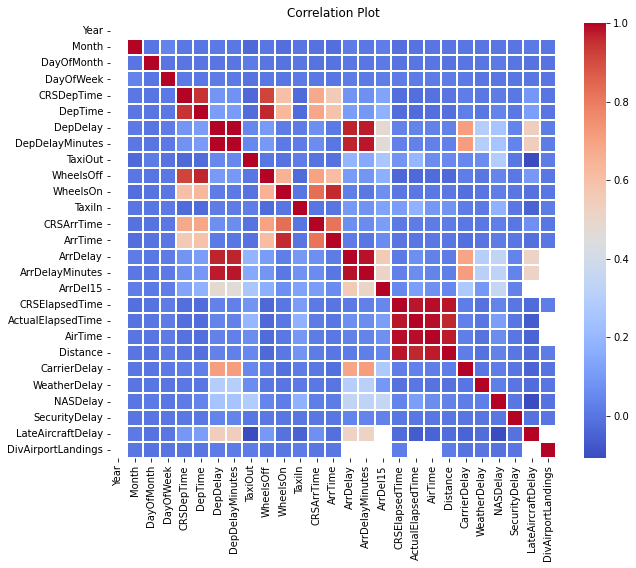

In [24]:
correlation_matrix = df_num.corr()

plt.figure(figsize=(10, 8))

sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', linewidths=0.3, fmt=".2f")

plt.title("Correlation Plot")

plt.show()

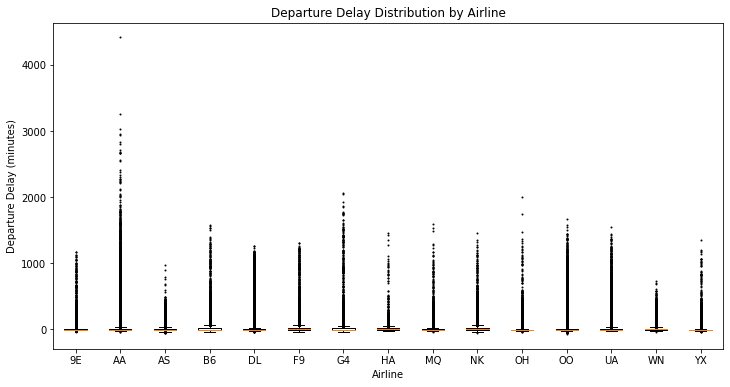

In [25]:
grouped_data = df.groupby('Reporting_Airline')

# Create an empty list to store the DepDelay data for each group
dep_delay_groups = []

# Create a list to store the airline names
airline_names = []

# Iterate through each group and extract DepDelay data and airline names
for group_name, group_df in grouped_data:
    dep_delay_data = group_df['DepDelay'].dropna()  # Drop missing values if any
    dep_delay_groups.append(dep_delay_data)
    airline_names.append(group_name)

# Create a boxplot
plt.figure(figsize=(12, 6))  # Adjust the figure size if needed
plt.boxplot(dep_delay_groups, labels=airline_names, flierprops={'markersize': 1})
plt.xlabel('Airline')
plt.ylabel('Departure Delay (minutes)')
plt.title('Departure Delay Distribution by Airline')
plt.show()

In [26]:
df['FlightDate'] = pd.to_datetime(df['FlightDate'])

summary_df = df.groupby(['DayOfWeek', 'DepDel15']).size().unstack(fill_value=0)
summary_df['TotalFlights'] = summary_df.sum(axis=1)
summary_df['Prop_DepDel15'] = summary_df[1] / summary_df['TotalFlights']
summary_df

DepDel15,0.0,1.0,TotalFlights,Prop_DepDel15
DayOfWeek,,,,
1,252886,64738,317624,0.203820
2,244076,53031,297107,0.178491
3,231485,65961,297446,0.221758
4,249287,67587,316874,0.213293
5,248840,70673,319513,0.221190
6,214025,59095,273120,0.216370
7,250872,74484,325356,0.228931


c:\Users\marti\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\core\arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
c:\Users\marti\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\core\arraylike.py:402: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


Text(0.5, 1.02, 'Density Plot of Departure Delay by Reporting Airline')

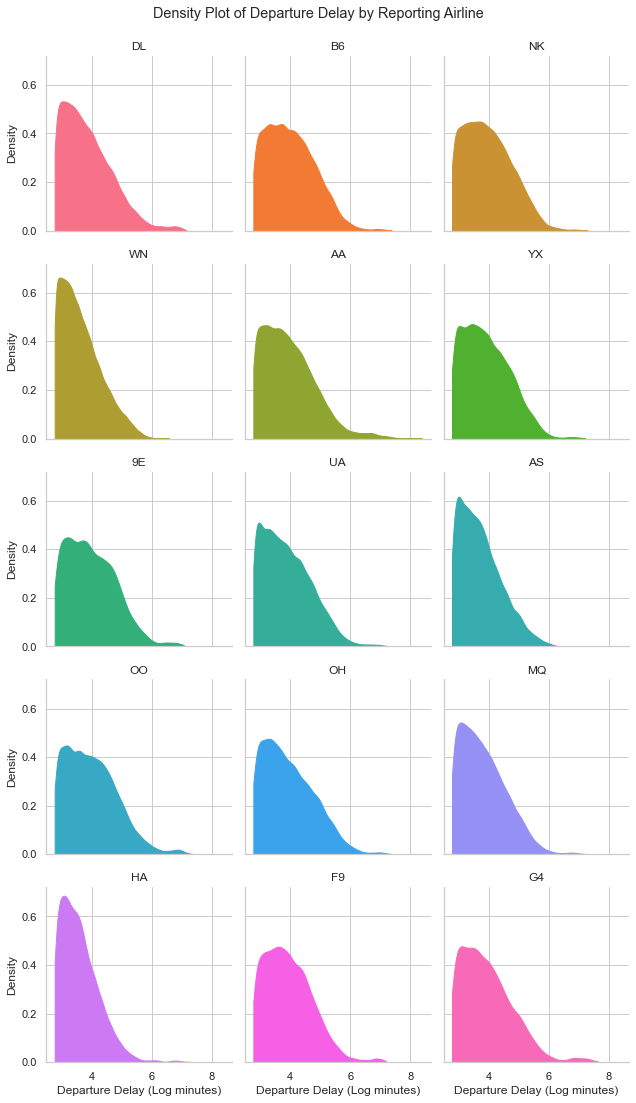

In [27]:
df['LogDepDelay15'] = np.where(df['DepDelay'] > 15, np.log(df['DepDelay']), 0)

sns.set(style="whitegrid")
g = sns.FacetGrid(df[df['LogDepDelay15']>0], col='Reporting_Airline', hue='Reporting_Airline', col_wrap=3)

g = g.map(sns.kdeplot, "LogDepDelay15", cut=0, fill=True, common_norm=False, alpha=1, legend=False)

g = g.set_titles("{col_name}")

g.set_axis_labels("Departure Delay (Log minutes)", "Density")
g.fig.suptitle("Density Plot of Departure Delay by Reporting Airline", y=1.02)

In [28]:
df['CRSDepTime'] = df['CRSDepTime'].astype(str)
df['CRSDepTime'] = df['CRSDepTime'].str.zfill(4)
df['DepHour'] = df['CRSDepTime'].str[:-2]
df['DepMinute'] = df['CRSDepTime'].str[-2:]
df['DepHour'] = df['DepHour'].str.zfill(2)
df['DepMinute'] = df['DepMinute'].str.zfill(2)

flight_counts = df.groupby(['Origin', 'Month', 'DayOfMonth', 'DepHour']).size().reset_index(name='FlightsSameTime')

df = df.merge(flight_counts, on=['Origin', 'Month', 'DayOfMonth', 'DepHour'], how='left')

df['FlightsSameTime'] = df['FlightsSameTime'].fillna(0).astype(int)

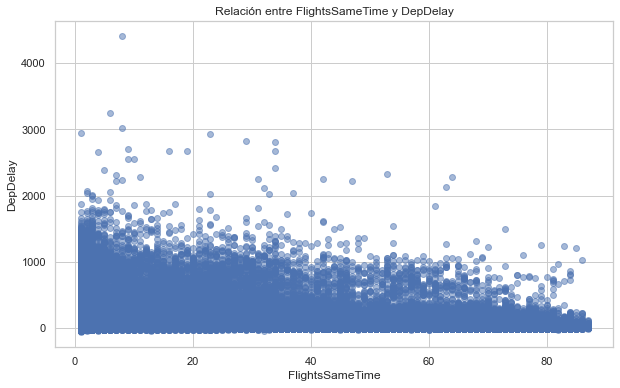

In [29]:
plt.figure(figsize=(10, 6))
plt.scatter(df['FlightsSameTime'], df['DepDelay'], alpha=0.5)
plt.title('Relación entre FlightsSameTime y DepDelay')
plt.xlabel('FlightsSameTime')
plt.ylabel('DepDelay')
plt.grid(True)

In [30]:
bin_width = 5

max_same_time = df['FlightsSameTime'].max()
num_bins = int(np.ceil(max_same_time / bin_width))

bins = np.arange(0, (num_bins + 1) * bin_width, bin_width)

df['FlightsSameTimeBin'] = pd.cut(df['FlightsSameTime'], bins=bins, labels=bins[:-1])

bin_proportions = df.groupby('FlightsSameTimeBin')['DepDel15'].mean().reset_index()

bin_proportions.columns = ['FlightsSameTimeBin', 'ProportionDelayed']

print(bin_proportions)

   FlightsSameTimeBin  ProportionDelayed
0                   0           0.188725
1                   5           0.200604
2                  10           0.219366
3                  15           0.224064
4                  20           0.232967
5                  25           0.234062
6                  30           0.212997
7                  35           0.198462
8                  40           0.227142
9                  45           0.233649
10                 50           0.225295
11                 55           0.218107
12                 60           0.217362
13                 65           0.194326
14                 70           0.202597
15                 75           0.187379
16                 80           0.288378
17                 85           0.266667


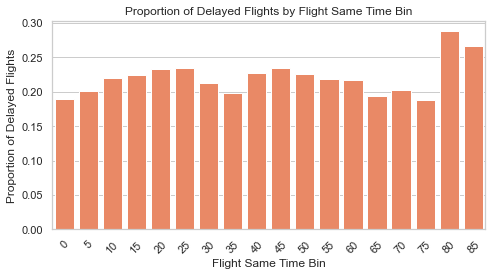

In [31]:
plt.figure(figsize=(7, 4))
sns.barplot(data=bin_proportions, x='FlightsSameTimeBin', y='ProportionDelayed', color='coral')
plt.xlabel("Flight Same Time Bin")
plt.ylabel("Proportion of Delayed Flights")
plt.title("Proportion of Delayed Flights by Flight Same Time Bin")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### Add feature flightssametime + 80 boolean

In [32]:
df.loc[df['FlightsSameTime'] > 80, 'FlightsSameTime80'] = True
df['FlightsSameTime80'].replace(np.NaN, False, inplace=True)

# Changes Saved

In [33]:
df.to_csv('data/flights_processed.csv', index=False)